Generation 0: Best fitness = 0.0026595744680851063, Best x = 3
Generation 100: Best fitness = 0.1, Best x = 2
Generation 200: Best fitness = 0.1, Best x = 2
Generation 300: Best fitness = 0.1, Best x = 2
Generation 400: Best fitness = 0.1, Best x = 2
Generation 500: Best fitness = 0.1, Best x = 2
Generation 600: Best fitness = 0.1, Best x = 2
Generation 700: Best fitness = 0.1, Best x = 2
Generation 800: Best fitness = 0.1, Best x = 6
Generation 900: Best fitness = 0.1, Best x = 2
Best solution: x = 2


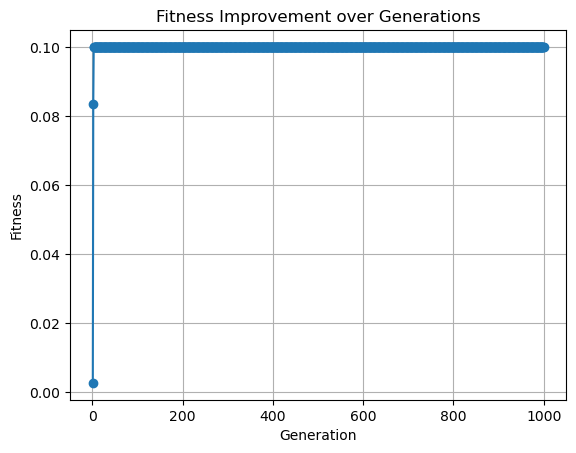

In [4]:
import random
import matplotlib.pyplot as plt

# Constants
POPULATION_SIZE = 20
GENES = 8  # Number of bits to represent the number
GENERATIONS = 1000
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.01

# Function to decode binary chromosome to float
def decode_chromosome(chromosome):
    return sum(gene * (2 ** i) for i, gene in enumerate(chromosome))

# Fitness function for the equation 4x^2 - 25 = 0
def fitness_function(x):
    return 1 / (1 + abs(4 * x ** 2 - 25))

# Generate initial population
def generate_population(size):
    return [[random.randint(0, 1) for _ in range(GENES)] for _ in range(size)] # Use range() to create an iterable sequence of numbers from 0 to size-1.

# Selection function using roulette wheel selection
def select(population, fitnesses):
    total_fitness = sum(fitnesses)
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, fitness in enumerate(fitnesses):
        current += fitness
        if current > pick:
            return population[i]

# Two-point crossover
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        point1 = random.randint(1, GENES - 2)
        point2 = random.randint(point1 + 1, GENES - 1)
        child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
        child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
        return child1, child2
    return parent1, parent2

# Mutation function
def mutate(chromosome):
    for i in range(GENES):
        if random.random() < MUTATION_RATE:
            chromosome[i] = 1 if chromosome[i] == 0 else 0

# Main GA function
def genetic_algorithm():
    population = generate_population(POPULATION_SIZE)
    best_fitnesses = []

    for generation in range(GENERATIONS):
        fitnesses = [fitness_function(decode_chromosome(chrom)) for chrom in population]
        next_population = []

        for _ in range(POPULATION_SIZE // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            next_population.extend([child1, child2])

        population = next_population

        best_fitness = max(fitnesses)
        best_fitnesses.append(best_fitness)

        if generation % 100 == 0:
            best_chromosome = population[fitnesses.index(best_fitness)]
            best_x = decode_chromosome(best_chromosome)
            print(f"Generation {generation}: Best fitness = {best_fitness}, Best x = {best_x}")

    best_fitness = max(fitnesses)
    best_chromosome = population[fitnesses.index(best_fitness)]
    best_x = decode_chromosome(best_chromosome)
    print(f"Best solution: x = {best_x}")

    return best_fitnesses

best_fitnesses = genetic_algorithm()

# Plotting the fitness improvement over generations
plt.figure()
plt.plot(range(1, GENERATIONS + 1), best_fitnesses, marker='o')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Improvement over Generations')
plt.grid(True)
plt.show()